# Perceptron Demo

This notebook demonstrates the usage of our Perceptron implementation on a simple binary classification dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

from perceptron import Perceptron

## Generate and Prepare Data

We'll create a simple linearly separable dataset using `make_blobs`.

In [2]:
# Generate linearly separable data
X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=2,
    cluster_std=1.0,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (80, 2)
Testing set shape: (20, 2)


## Train and Evaluate Perceptron Model

In [3]:
# Initialize and train the model
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train_scaled, y_train)

# Make predictions
y_pred = perceptron.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


## Visualize Results

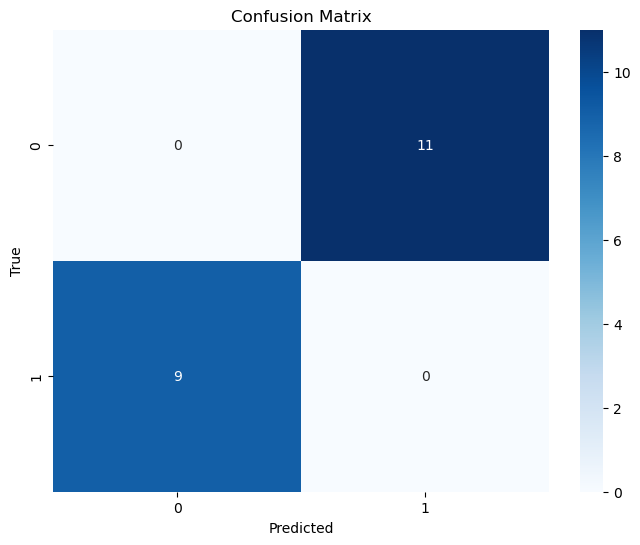

In [4]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Visualize Decision Boundary

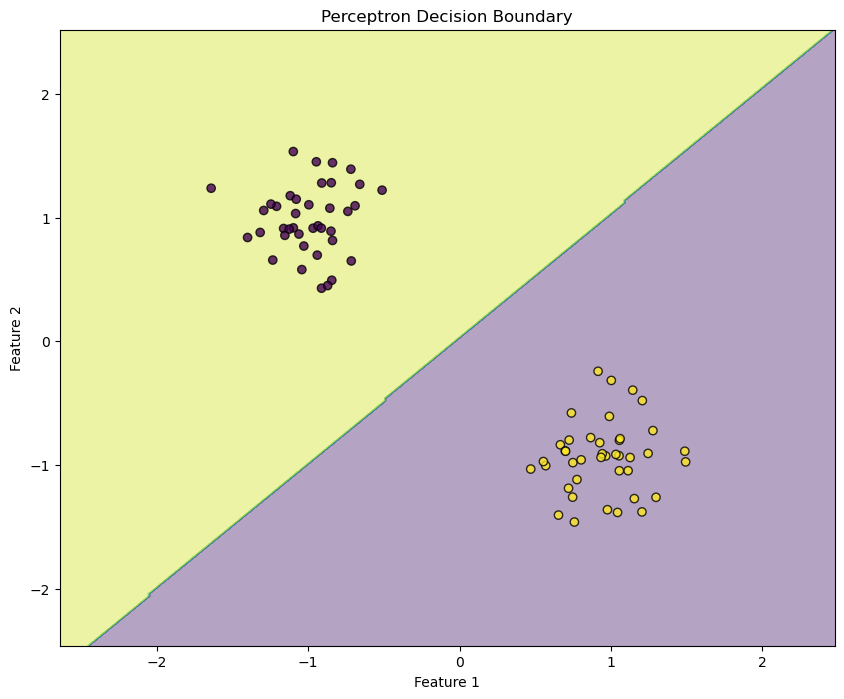

In [5]:
# Create mesh grid
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in the mesh grid
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
            c=y_train, alpha=0.8, edgecolors='k')
plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Visualize Weight Vector

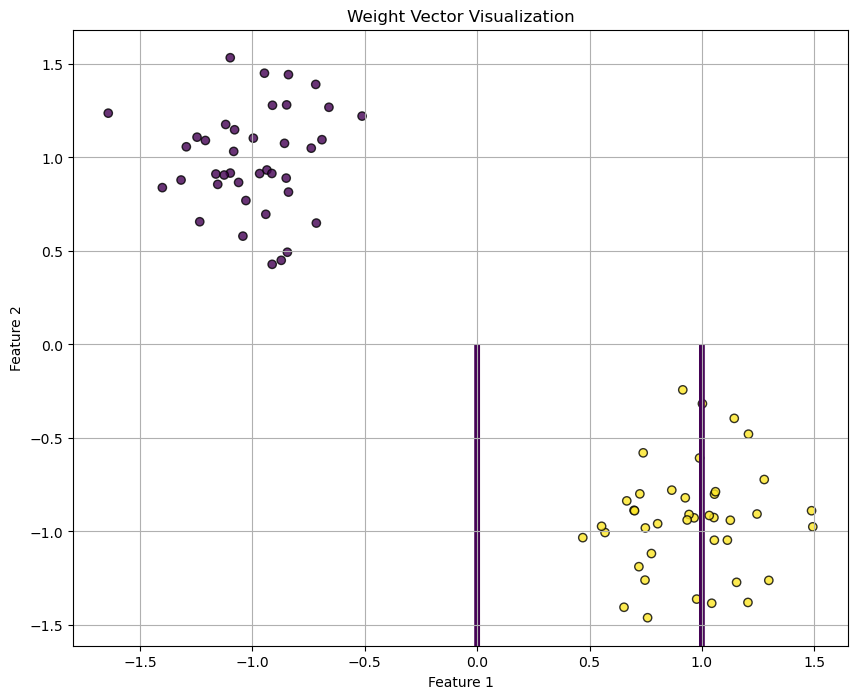

In [6]:
# Plot weight vector
plt.figure(figsize=(10, 8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
            c=y_train, alpha=0.8, edgecolors='k')

# Plot weight vector
origin = np.array([[0, 0]])
weights = np.array([perceptron.weights])
plt.quiver(*origin, weights[:, 0], weights[:, 1], 
           color=['r'], scale=10)

plt.title('Weight Vector Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()